In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

Saving EEG_Full_Spectrum_Features_All_Users1_pivoted.csv to EEG_Full_Spectrum_Features_All_Users1_pivoted.csv


In [5]:
import pandas as pd
df_pivoted = pd.read_csv('EEG_Full_Spectrum_Features_All_Users1_pivoted.csv')
print(df_pivoted)

      Unnamed: 0 User  product_page  Bought  Alpha_Freq_10_FFT_Electrode_1  \
0              0  S01            11       0                     389.347719   
1              1  S01            12       0                      17.319813   
2              2  S01            13       0                     102.179924   
3              3  S01            14       1                      50.225631   
4              4  S01            15       0                      10.605075   
...          ...  ...           ...     ...                            ...   
3247        3247  S44           619       0                      61.262399   
3248        3248  S44           620       1                      19.770211   
3249        3249  S44           621       0                      38.829805   
3250        3250  S44           622       0                     172.130770   
3251        3251  S44           624       0                      25.977570   

      Alpha_Freq_10_FFT_Electrode_2  Alpha_Freq_10_FFT_Electrod

In [7]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from torch_geometric.data import Data
import numpy as np

num_samples = df_pivoted.shape[0]
num_electrodes = 19
num_features = 98

graph_list = []

def create_graph_for_sample(sample_idx):
    electrode_features = {}

    for col in df_pivoted.columns:
        if "Electrode" in col:
            electrode_num = int(col.split("_")[-1])
            if electrode_num not in electrode_features:
                electrode_features[electrode_num] = []
            electrode_features[electrode_num].append(df_pivoted.iloc[sample_idx][col])

    node_features = np.array([electrode_features[e] for e in sorted(electrode_features.keys())])

    def compute_connectivity_matrix(data):
        connectivity_matrix = np.corrcoef(data)
        np.fill_diagonal(connectivity_matrix, 0)
        return connectivity_matrix

    edge_weights = compute_connectivity_matrix(node_features)

    edge_index = []
    edge_attr = []
    for i in range(num_electrodes):
        for j in range(num_electrodes):
            if i != j:
                edge_index.append([i, j])
                edge_attr.append(edge_weights[i, j])

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float).view(-1, 1)

    x = torch.tensor(node_features, dtype=torch.float)

    data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
    return data

for i in range(num_samples):
    graph = create_graph_for_sample(i)
    graph_list.append(graph)
    print(f"Graph {i + 1}/{num_samples} done")


print(f"Number of Graphs {len(graph_list)}")
print(f"Dimensions of each node's features: {graph_list[0].x.shape}")


Graph 1/3252 done
Graph 2/3252 done
Graph 3/3252 done
Graph 4/3252 done
Graph 5/3252 done
Graph 6/3252 done
Graph 7/3252 done
Graph 8/3252 done
Graph 9/3252 done
Graph 10/3252 done
Graph 11/3252 done
Graph 12/3252 done
Graph 13/3252 done
Graph 14/3252 done
Graph 15/3252 done
Graph 16/3252 done
Graph 17/3252 done
Graph 18/3252 done
Graph 19/3252 done
Graph 20/3252 done
Graph 21/3252 done
Graph 22/3252 done
Graph 23/3252 done
Graph 24/3252 done
Graph 25/3252 done
Graph 26/3252 done
Graph 27/3252 done
Graph 28/3252 done
Graph 29/3252 done
Graph 30/3252 done
Graph 31/3252 done
Graph 32/3252 done
Graph 33/3252 done
Graph 34/3252 done
Graph 35/3252 done
Graph 36/3252 done
Graph 37/3252 done
Graph 38/3252 done
Graph 39/3252 done
Graph 40/3252 done
Graph 41/3252 done
Graph 42/3252 done
Graph 43/3252 done
Graph 44/3252 done
Graph 45/3252 done
Graph 46/3252 done
Graph 47/3252 done
Graph 48/3252 done
Graph 49/3252 done
Graph 50/3252 done
Graph 51/3252 done
Graph 52/3252 done
Graph 53/3252 done
Gr

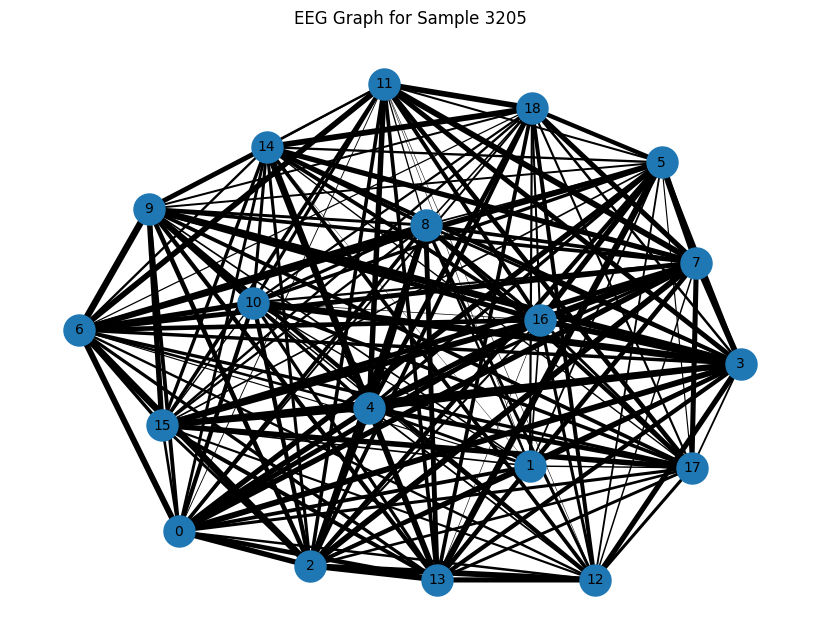

Nodes features for Sample 3205


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 89,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98
Electrode 1,18.445829,0.376353,28.669849,0.352838,20.855373,0.300623,97.236038,0.322791,188.008652,0.365389,...,123.253204,0.756781,187.746445,0.763876,105.290176,0.709726,105.290176,0.709726,47.350876,0.603166
Electrode 2,19.941994,0.252916,11.715222,0.227917,8.198965,0.186735,171.604736,0.235526,83.455650,0.255680,...,151.063477,0.866299,162.120605,0.886623,122.943123,0.828820,122.943123,0.828820,60.732822,0.705431
Electrode 3,37.123917,0.581057,15.607792,0.534614,9.599130,0.449510,94.467178,0.526629,217.900116,0.578117,...,212.650330,1.796862,233.232193,1.820733,134.675903,1.679913,134.675903,1.679913,50.049938,1.406775
Electrode 4,29.566387,0.883903,28.306147,0.801111,20.398247,0.661763,85.351364,0.819127,260.491547,0.890447,...,251.064682,2.511586,288.529358,2.570243,133.232162,2.380379,133.232162,2.380379,41.472134,1.991373
Electrode 5,30.409542,1.074431,33.456608,0.976481,25.417959,0.808461,51.093475,0.988430,299.175751,1.078796,...,236.704575,2.334483,298.259460,2.406391,119.775246,2.239832,119.775246,2.239832,33.115711,1.880466
Electrode 6,26.944204,0.576187,23.172972,0.532657,18.405136,0.448864,59.183037,0.512203,238.252914,0.568815,...,89.481972,0.946960,208.109863,0.952410,77.711746,0.873938,77.711746,0.873938,23.276987,0.728098
Electrode 7,17.646961,0.291449,25.909517,0.269498,19.055059,0.226585,56.713909,0.257192,166.447540,0.286987,...,126.106018,0.692442,168.385132,0.680893,56.726948,0.616976,56.726948,0.616976,19.988461,0.510981
Electrode 8,12.634744,0.446198,25.440596,0.431618,19.146076,0.379035,117.523720,0.357407,235.740768,0.419145,...,127.941383,0.887424,163.875000,0.860230,73.563728,0.769405,73.563728,0.769405,31.713234,0.630027
Electrode 9,40.247429,0.210823,18.397427,0.203255,14.029963,0.178837,43.909740,0.172711,153.423538,0.199739,...,135.100540,1.368117,288.381714,1.364981,35.878780,1.252431,35.878780,1.252431,14.960442,1.049392
Electrode 10,78.549690,3.383410,47.512314,3.022482,33.479588,2.461871,71.028709,3.232533,482.491089,3.459764,...,453.113556,6.412078,502.408386,6.652914,276.791687,6.259332,276.791687,6.259332,73.093590,5.333693


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 89,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98
Electrode 1,18.445829,0.376353,28.669849,0.352838,20.855373,0.300623,97.236038,0.322791,188.008652,0.365389,...,123.253204,0.756781,187.746445,0.763876,105.290176,0.709726,105.290176,0.709726,47.350876,0.603166
Electrode 2,19.941994,0.252916,11.715222,0.227917,8.198965,0.186735,171.604736,0.235526,83.455650,0.255680,...,151.063477,0.866299,162.120605,0.886623,122.943123,0.828820,122.943123,0.828820,60.732822,0.705431
Electrode 3,37.123917,0.581057,15.607792,0.534614,9.599130,0.449510,94.467178,0.526629,217.900116,0.578117,...,212.650330,1.796862,233.232193,1.820733,134.675903,1.679913,134.675903,1.679913,50.049938,1.406775
Electrode 4,29.566387,0.883903,28.306147,0.801111,20.398247,0.661763,85.351364,0.819127,260.491547,0.890447,...,251.064682,2.511586,288.529358,2.570243,133.232162,2.380379,133.232162,2.380379,41.472134,1.991373
Electrode 5,30.409542,1.074431,33.456608,0.976481,25.417959,0.808461,51.093475,0.988430,299.175751,1.078796,...,236.704575,2.334483,298.259460,2.406391,119.775246,2.239832,119.775246,2.239832,33.115711,1.880466
Electrode 6,26.944204,0.576187,23.172972,0.532657,18.405136,0.448864,59.183037,0.512203,238.252914,0.568815,...,89.481972,0.946960,208.109863,0.952410,77.711746,0.873938,77.711746,0.873938,23.276987,0.728098
Electrode 7,17.646961,0.291449,25.909517,0.269498,19.055059,0.226585,56.713909,0.257192,166.447540,0.286987,...,126.106018,0.692442,168.385132,0.680893,56.726948,0.616976,56.726948,0.616976,19.988461,0.510981
Electrode 8,12.634744,0.446198,25.440596,0.431618,19.146076,0.379035,117.523720,0.357407,235.740768,0.419145,...,127.941383,0.887424,163.875000,0.860230,73.563728,0.769405,73.563728,0.769405,31.713234,0.630027
Electrode 9,40.247429,0.210823,18.397427,0.203255,14.029963,0.178837,43.909740,0.172711,153.423538,0.199739,...,135.100540,1.368117,288.381714,1.364981,35.878780,1.252431,35.878780,1.252431,14.960442,1.049392
Electrode 10,78.549690,3.383410,47.512314,3.022482,33.479588,2.461871,71.028709,3.232533,482.491089,3.459764,...,453.113556,6.412078,502.408386,6.652914,276.791687,6.259332,276.791687,6.259332,73.093590,5.333693


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def plot_graph_with_features(sample_idx):

    data = graph_list[sample_idx]

    edge_index = data.edge_index.numpy()
    edge_attr = data.edge_attr.numpy()

    normalized_edge_attr = (edge_attr - edge_attr.min()) / (edge_attr.max() - edge_attr.min())

    G = nx.Graph()
    G.add_edges_from(edge_index.T)

    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        with_labels=True,
        node_size=500,
        font_size=10,
        width=normalized_edge_attr.flatten() * 5
    )
    plt.title(f"EEG Graph for Sample {sample_idx + 1}")
    plt.show()

    df_features = pd.DataFrame(data.x.numpy(), columns=[f'Feature {i+1}' for i in range(data.x.shape[1])])
    df_features.index = [f'Electrode {i+1}' for i in range(data.x.shape[0])]

    print(f"Nodes features for Sample {sample_idx + 1}")
    display(df_features)
    return df_features

plot_graph_with_features(3204)


In [10]:
import torch

graph_data = []

for i in range(num_samples):
    graph_info = {
        "graph": graph_list[i],
        "label": int(df_pivoted.iloc[i]["Bought"]),
        "user": df_pivoted.iloc[i]["User"],
        "product_page": df_pivoted.iloc[i]["product_page"],
    }
    graph_data.append(graph_info)

torch.save(graph_data, "eeg_graphs_ordered.pt")
print("Graphs saved with labels and additional information")


Graphs saved with labels and additional information


In [11]:
import pandas as pd

node_features_list = [graph.x.numpy() for graph in graph_list]
df_node_features = pd.DataFrame(np.vstack(node_features_list))
df_node_features.to_csv("node_features.csv", index=False)
print("Node features saved.")

edge_list = []
for i, graph in enumerate(graph_list):
    edge_array = graph.edge_index.numpy().T
    for edge in edge_array:
        edge_list.append([i, edge[0], edge[1]])

df_edges = pd.DataFrame(edge_list, columns=["Sample", "Source", "Target"])
df_edges.to_csv("edges.csv", index=False)
print("Edge list saved.")


Node features saved.
Edge list saved.
